# Lecture 6: k-nearest neighbours

In this notebook we will do some investigations to get to know the MNIST dataset a little better. You will need the mnist package which can be installed through anaconda using

conda install -c conda-forge mnist

In [1]:
import matplotlib.pyplot as plt
import mnist
import numpy as np
train_set = mnist.train_images()
train_labels = mnist.train_labels()
print(train_set.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


Build a grid of some samples from each category.

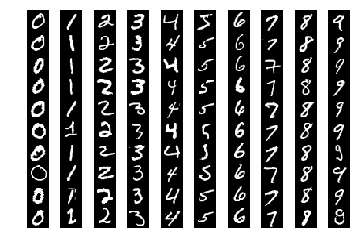

In [17]:
fig, ax = plt.subplots(10,10)
plt.subplots_adjust(wspace=0, hspace=0)
for i in range(10):
    t = train_set[train_labels==i,:,:][0:10,:,:]
    for j in range(10):
        ax[j,i].imshow(t[j,:,:], cmap='gray')
        ax[j,i].set_axis_off()
plt.savefig('../figures/classification/mnist-10x10.pdf')

We will be working with this data in vectorial form, so let's see how it looks in that representation


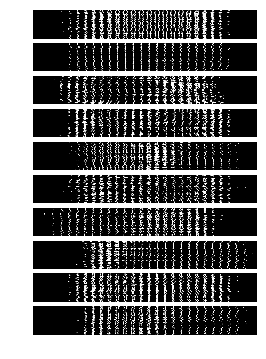

In [3]:
fig, ax = plt.subplots(10,1,figsize=[4,6])
plt.subplots_adjust(wspace=0, hspace=0.1)
for i in range(10):
    t = np.random.permutation(train_set[train_labels==i,:,:])
    im = []
    for j in range(100):
        im.append(np.squeeze(np.reshape(t[j,:,:],(1,-1))))
    im = np.array(im)
    ax[i].imshow(np.array(im), cmap='gray')
    ax[i].set_axis_off()
plt.savefig('../figures/classification/mnist-vectorised.pdf')
    

## Nearest neighbour classification
Let us try something exceptionally simple. For each image in the testing set, we will find its nearest-neighbour in the training set and assign it to that category.

First, we define functions to run and evaluate knn. This implementation uses the Euclidean distance.

In [2]:
from scipy.stats import mode
def knn(test_set, train_set, train_labels, k):
    ### Returns the most common label in the training set of the k-nn for each element in the test set.
    predictions = []
    for i in test_set:
        distances = [np.linalg.norm(i-j) for j in train_set]
        indices = np.argsort(distances)[0:k]
        predictions.append(mode(train_labels[indices])[0][0])
    return predictions

def knn_evaluate(predicted_labels, true_labels):
    confusion_matrix = np.zeros([10,10])
    for i, l in enumerate(true_labels):
        confusion_matrix[l, predicted_labels[i]] += 1
    for i,c in enumerate(confusion_matrix):
        print(str(i) + ' & ' + ' & '.join(['{:3.0f}'.format(i) for i in c]) + '\\ \hline')
    plt.imshow(confusion_matrix,cmap='gray')
    plt.tight_layout()
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    print(sum(confusion_matrix.diagonal())/sum(sum(confusion_matrix)))

Load in the test data

In [3]:
test_set = mnist.test_images()
test_labels = mnist.test_labels()

NameError: name 'mnist' is not defined

Vectorise the data

In [6]:
test_set = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in test_set]))
train_set = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in train_set]))
print(test_set.shape)
print(train_set.shape)

(10000, 784)
(60000, 784)


Choose 100 examples of each class from the test set, and 1000 from the training set.

In [7]:
train_index = []
test_index = []
for i in range(10):
    train_index.append(np.where(train_labels==i)[0][0:1000])
    test_index.append(np.where(test_labels==i)[0][0:100])
train_index = [item for sublist in train_index for item in sublist]
test_index = [item for sublist in test_index for item in sublist]

In [8]:
p = knn(test_set[test_index], train_set[train_index], train_labels[train_index], 1)

0 &  83 &   1 &   1 &   0 &   0 &   0 &   5 &   0 &  10 &   0\ \hline
1 &   0 & 100 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0\ \hline
2 &   1 &  11 &  53 &   2 &   1 &   0 &   3 &   4 &  25 &   0\ \hline
3 &   0 &  11 &   2 &  48 &   0 &   1 &   4 &   3 &  28 &   3\ \hline
4 &   2 &   9 &   0 &   0 &  42 &   0 &   2 &   3 &  16 &  26\ \hline
5 &   2 &   7 &   0 &   4 &   0 &  36 &   2 &   0 &  43 &   6\ \hline
6 &   3 &   6 &   0 &   0 &   0 &   1 &  80 &   0 &  10 &   0\ \hline
7 &   0 &  11 &   0 &   1 &   0 &   0 &   1 &  75 &   4 &   8\ \hline
8 &   2 &  13 &   0 &   6 &   1 &   3 &   3 &   4 &  65 &   3\ \hline
9 &   0 &   5 &   1 &   1 &   4 &   0 &   0 &   4 &   2 &  83\ \hline
0.665


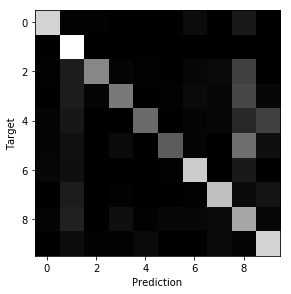

In [9]:
knn_evaluate(p, test_labels[test_index])
plt.savefig('../figures/classification/knn-mnist-k=1-confusion.pdf')

Not bad - try k=3, 5, 7

0 &  95 &   1 &   0 &   0 &   0 &   0 &   1 &   0 &   3 &   0\ \hline
1 &   0 & 100 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0\ \hline
2 &   4 &  14 &  68 &   0 &   0 &   0 &   1 &   2 &  11 &   0\ \hline
3 &   2 &  13 &   4 &  64 &   0 &   1 &   3 &   2 &   8 &   3\ \hline
4 &   2 &  13 &   1 &   0 &  51 &   0 &   4 &   2 &   3 &  24\ \hline
5 &   5 &  13 &   0 &  10 &   1 &  39 &   2 &   0 &  24 &   6\ \hline
6 &   2 &   7 &   0 &   0 &   1 &   1 &  88 &   0 &   1 &   0\ \hline
7 &   0 &  18 &   2 &   1 &   1 &   1 &   0 &  68 &   3 &   6\ \hline
8 &   3 &  18 &   0 &   3 &   1 &   3 &   3 &   4 &  65 &   0\ \hline
9 &   1 &   7 &   0 &   1 &   1 &   0 &   0 &   2 &   2 &  86\ \hline
0.724


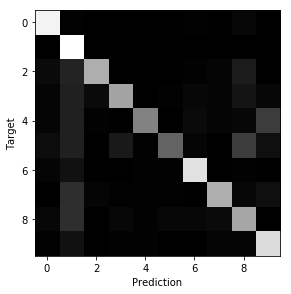

In [10]:
p = knn(test_set[test_index], train_set[train_index], train_labels[train_index], 3)
knn_evaluate(p, test_labels[test_index])
plt.savefig('../figures/classification/knn-mnist-k=3-confusion.pdf')

In [11]:
test_set


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

0 &  97 &   1 &   0 &   0 &   0 &   0 &   1 &   0 &   1 &   0\ \hline
1 &   0 & 100 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0\ \hline
2 &   3 &  17 &  69 &   1 &   0 &   0 &   2 &   3 &   5 &   0\ \hline
3 &   1 &  19 &   1 &  60 &   0 &   0 &   6 &   3 &   7 &   3\ \hline
4 &   2 &  12 &   1 &   0 &  50 &   0 &   5 &   1 &   4 &  25\ \hline
5 &   5 &   9 &   0 &   5 &   2 &  51 &   2 &   0 &  19 &   7\ \hline
6 &   2 &   7 &   0 &   0 &   1 &   1 &  89 &   0 &   0 &   0\ \hline
7 &   0 &  18 &   0 &   0 &   1 &   1 &   0 &  73 &   2 &   5\ \hline
8 &   3 &  18 &   1 &   3 &   0 &   1 &   4 &   5 &  65 &   0\ \hline
9 &   1 &   9 &   0 &   0 &   0 &   0 &   0 &   1 &   4 &  85\ \hline
0.739


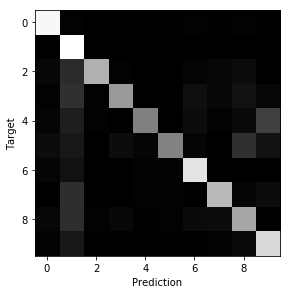

In [12]:
p = knn(test_set[test_index], train_set[train_index], train_labels[train_index], 5)
knn_evaluate(p, test_labels[test_index])
plt.savefig('../figures/classification/knn-mnist-k=5-confusion.pdf')

0 &  95 &   1 &   0 &   0 &   0 &   0 &   3 &   0 &   1 &   0\ \hline
1 &   0 & 100 &   0 &   0 &   0 &   0 &   0 &   0 &   0 &   0\ \hline
2 &   1 &  17 &  70 &   0 &   0 &   0 &   2 &   4 &   6 &   0\ \hline
3 &   1 &  20 &   0 &  61 &   0 &   1 &   6 &   2 &   5 &   4\ \hline
4 &   3 &   9 &   0 &   0 &  55 &   0 &   4 &   1 &   2 &  26\ \hline
5 &   5 &   9 &   1 &   5 &   1 &  51 &   3 &   0 &  17 &   8\ \hline
6 &   2 &   7 &   0 &   0 &   0 &   1 &  90 &   0 &   0 &   0\ \hline
7 &   1 &  17 &   1 &   0 &   1 &   0 &   0 &  75 &   1 &   4\ \hline
8 &   3 &  16 &   1 &   2 &   0 &   1 &   4 &   5 &  66 &   2\ \hline
9 &   1 &   7 &   0 &   0 &   0 &   0 &   0 &   2 &   2 &  88\ \hline
0.751


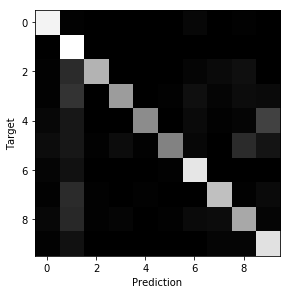

In [13]:
p = knn(test_set[test_index], train_set[train_index], train_labels[train_index], 7)
knn_evaluate(p, test_labels[test_index])
plt.savefig('../figures/classification/knn-mnist-k=7-confusion.pdf')